# Breve análise do crescimento do coronavírus na micro região de São João del Rei


In [1]:
import pandas as pd
import numpy as np

# Importação do matplotlib e seaborn para visualizações
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("dados/df_micro.csv")[
    ['epi_week',
    'date',
#    'country',
#    'state',
    'city',
    'ibgeID',
#    'cod_RegiaoDeSaude',
#    'name_RegiaoDeSaude',
    'newDeaths',
    'deaths',
    'newCases',
    'totalCases',
#    'deaths_per_100k_inhabitants',
#    'totalCases_per_100k_inhabitants',
#    'deaths_by_totalCases',
#    '_source',
#    'last_info_date'
    ]]

Abaixo são exibidos os primeiros 10 registros do dataframe

In [3]:
dataset.head(10)

,epi_week,date,city,ibgeID,newDeaths,deaths,newCases,totalCases
0,13,2020-03-26,São João del Rei/MG,3162500,0,0,1,1
1,13,2020-03-27,São João del Rei/MG,3162500,0,0,0,1
2,13,2020-03-28,São João del Rei/MG,3162500,0,0,1,2
3,14,2020-03-29,São João del Rei/MG,3162500,0,0,0,2
4,14,2020-03-30,São João del Rei/MG,3162500,0,0,0,2
5,14,2020-03-31,São João del Rei/MG,3162500,0,0,0,2
6,14,2020-04-01,São João del Rei/MG,3162500,0,0,0,2
7,14,2020-04-02,São João del Rei/MG,3162500,0,0,1,3
8,14,2020-04-03,São João del Rei/MG,3162500,0,0,0,3
9,14,2020-04-04,São João del Rei/MG,3162500,0,0,0,3


Agora irei agrupar os dados por semana epidemiológica e por cidade

In [4]:
weekDataset = dataset.groupby(['epi_week','city','ibgeID']).agg({'newDeaths':'sum', 'newCases':'sum','deaths':'max','totalCases':'max'}).reset_index()

weekDataset.head(10)

,epi_week,city,ibgeID,newDeaths,newCases,deaths,totalCases
0,13,São João del Rei/MG,3162500,0,2,0,2
1,14,São João del Rei/MG,3162500,0,1,0,3
2,15,São João del Rei/MG,3162500,0,0,0,3
3,16,Nazareno/MG,3144508,0,1,0,1
4,16,São João del Rei/MG,3162500,0,1,0,4
5,17,Lagoa Dourada/MG,3137403,0,0,0,1
6,17,Nazareno/MG,3144508,0,0,0,1
7,17,São João del Rei/MG,3162500,0,1,0,5
8,18,Lagoa Dourada/MG,3137403,0,0,0,0
9,18,Nazareno/MG,3144508,0,0,0,1


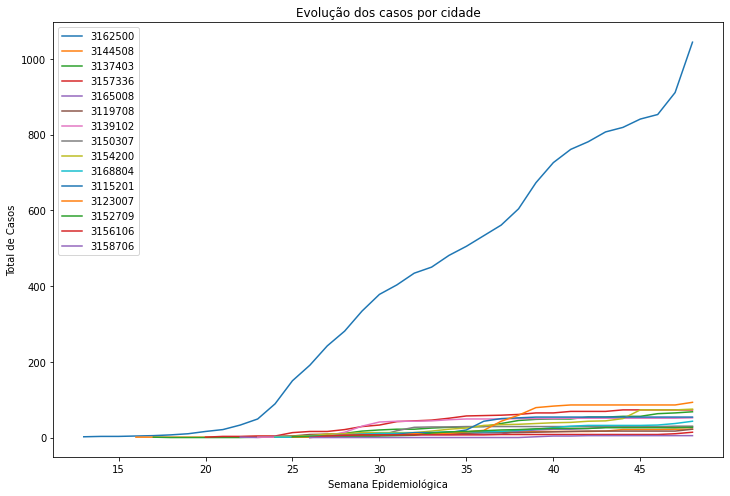

In [5]:
idsCidades = list(weekDataset['ibgeID'].drop_duplicates())

plt.figure(figsize=(12,8))

ax = plt.axes()

for idCidade in idsCidades:
    dfCidade = weekDataset.loc[weekDataset.ibgeID == idCidade]
    ax.plot(dfCidade.epi_week, dfCidade.totalCases, label=idCidade)
    
ax.set(xlabel='Semana Epidemiológica', ylabel='Total de Casos', title='Evolução dos casos por cidade')

plt.legend()


In [6]:
datasetAgrupado = dataset.groupby(['epi_week']).agg({'newDeaths':'sum', 'newCases':'sum','deaths':'max','totalCases':'max'}).reset_index()
datasetAgrupado

,epi_week,newDeaths,newCases,deaths,totalCases
0,13,0,2,0,2
1,14,0,1,0,3
2,15,0,0,0,3
3,16,0,2,0,4
4,17,0,1,0,5
5,18,0,2,0,7
6,19,0,3,0,10
7,20,0,7,0,16
8,21,1,7,1,21
9,22,0,12,1,33


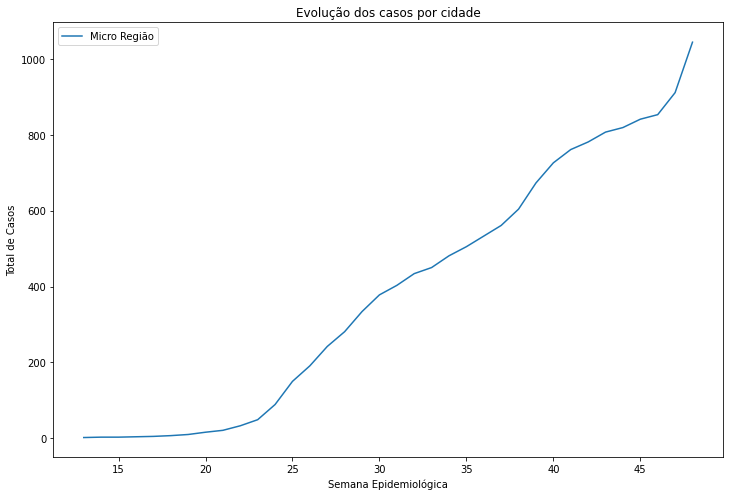

In [7]:
plt.figure(figsize=(12,8))

ax = plt.axes()

ax.plot(datasetAgrupado.epi_week, datasetAgrupado.totalCases, label='Micro Região')
plt.plot()

ax.set(xlabel='Semana Epidemiológica', ylabel='Total de Casos', title='Evolução dos casos por cidade')

plt.legend()

In [11]:
df_new_cases = pd.read_csv('dados/df_micro.csv').query('epi_week >= 27')
    
cities_new_cases = {}

# Para cada cidade.
for cityID in set(df_new_cases['ibgeID']):
    temp = df_new_cases.query("ibgeID == '%s'" % cityID).sort_values(by=['date'], ascending=True)['newCases']
    cities_new_cases[cityID] = np.array(temp)

cities_new_cases

{3115201: array([ 0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  0,  0,  0,  0,  8,  4,
        11,  0,  0,  2,  0,  0,  5,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]),
 3150307: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 6, 4, 0, 0, 7, 0, 0, 2, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 